# K-means clustering

In [1]:
import pandas as pd
from utils import import_df
import json
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from umap import UMAP
from utils import export_df
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

df = import_df("3-noise-generation-output.json")
df_base = df.copy()
df


,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
0,-0.265235,-5.048122,-3.631346,-4.439543,-3.357498,-0.204776,-1.318228,-0.339534,-1.400015,-0.246901,...,2.714593,0.492976,0.603847,2.324498,1.467088,0.164199,0.817187,2.849615,3.974052,working-engine-1
1,1.803906,-7.633756,-5.389268,-1.570934,-2.791938,-1.642577,-1.893539,0.155088,-0.426586,0.362725,...,0.236706,0.724190,0.840423,2.849037,1.844653,-0.383697,0.384010,0.855245,3.966374,working-engine-1
2,0.034944,-7.383289,-10.814815,-5.313512,-2.078825,-0.999530,-2.935479,-0.510686,-0.604878,-0.327708,...,0.659316,0.623644,0.659468,1.542131,1.696922,0.437205,0.764138,2.917843,3.971816,working-engine-1
3,-1.236713,-6.816264,-4.414403,-2.289054,-2.182520,-1.306811,-1.128795,0.227098,0.474560,-0.287856,...,-0.075597,0.661056,0.600652,2.515246,1.543970,0.487229,0.668764,2.192881,3.963132,working-engine-1
4,-0.631867,1.805891,-4.057512,-3.777951,-4.524474,-0.794026,-2.293586,0.294561,-0.637668,-0.196524,...,2.600142,0.601755,0.647312,2.270040,1.837363,0.157348,0.354827,1.877270,3.961272,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,1.621144,6.426994,2.831992,0.201274,-0.176498,0.919015,2.139039,0.051557,0.285876,-0.177516,...,0.449212,1.276837,0.998948,1.012256,0.556325,1.119456,0.995157,0.564188,3.933841,working-engine-2
31796,-0.753628,-2.764779,-0.148560,-2.216969,-0.432313,0.391412,0.198170,-0.161367,-0.208661,0.363186,...,1.856536,0.848850,1.120537,1.191309,1.191670,1.480539,0.851721,0.213766,3.946284,working-engine-2
31797,-0.224139,-1.600675,-2.785047,0.721778,0.588208,-0.655339,1.173323,-0.078556,-0.200729,-0.444910,...,-0.148535,1.244980,1.009357,1.303742,1.644411,1.433706,1.033311,1.286546,3.932896,working-engine-2
31798,-1.836151,2.152550,-0.564253,0.057216,-0.133246,0.419357,-0.712477,-1.009656,1.032995,-0.294873,...,1.181915,0.998754,1.083066,-0.116311,1.370810,1.055747,0.920297,0.808079,3.916539,working-engine-2


In [2]:
df = df.drop("label", axis=1)

## Compute distortions and inertias

- distortion = It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- inertia = It is the sum of squared distances of samples to their closest cluster center.

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in tqdm(K):
    kmean_model = KMeans(init="k-means++", n_clusters=k)
    kmean_model.fit(df)

    distortions.append(
        sum(
            np.min(
                cdist(df, kmean_model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / df.shape[0]
    )
    inertias.append(kmean_model.inertia_)

    mapping1[k] = (
        sum(
            np.min(
                cdist(df, kmean_model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / df.shape[0]
    )
    mapping2[k] = kmean_model.inertia_


  0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
for key, val in mapping1.items():
    print(f"{key} : {val}")

1 : 11.590748300376022
2 : 10.48431811697829
3 : 9.743915166195457
4 : 9.330214314857521
5 : 9.07746578318067
6 : 8.87080493087725
7 : 8.728752108146823
8 : 8.628874812693505
9 : 8.5526943446782


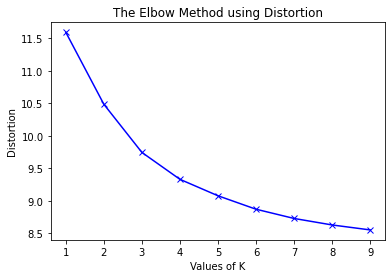

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [6]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 4540045.450723789
2 : 3678500.0509617836
3 : 3165773.2582269455
4 : 2894945.37809055
5 : 2737306.2163535724
6 : 2611896.927841079
7 : 2528607.04835928
8 : 2471819.873920258
9 : 2427649.2780892365


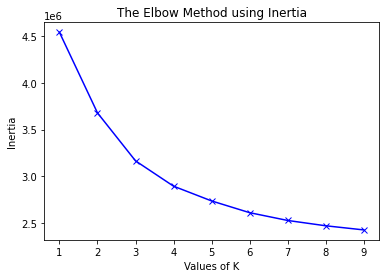

In [7]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [8]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(init="k-means++", n_clusters=n_clusters)
clusters_df = kmeans.fit(df)
kmeans.labels_

{0, 1, 2, 3}

## PCA and UMAP

[0.18615671 0.09373232]


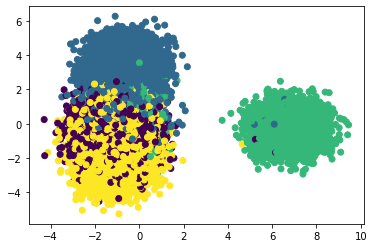

In [10]:
sc = StandardScaler()
X_norm = sc.fit_transform(df)
pca = PCA(n_components=2)
components = pca.fit_transform(X_norm)
#explained variance of the 3 components (how much well we're able to see)
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.sum()

plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_)
plt.show()

In [11]:
df.loc[:, 'kmeans_label'] = kmeans.labels_
export_df(df, "5-kmeans-clustering-output.json")

In [12]:
df.head()

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,kmeans_label
0,-0.265235,-5.048122,-3.631346,-4.439543,-3.357498,-0.204776,-1.318228,-0.339534,-1.400015,-0.246901,...,2.714593,0.492976,0.603847,2.324498,1.467088,0.164199,0.817187,2.849615,3.974052,2
1,1.803906,-7.633756,-5.389268,-1.570934,-2.791938,-1.642577,-1.893539,0.155088,-0.426586,0.362725,...,0.236706,0.724190,0.840423,2.849037,1.844653,-0.383697,0.384010,0.855245,3.966374,2
2,0.034944,-7.383289,-10.814815,-5.313512,-2.078825,-0.999530,-2.935479,-0.510686,-0.604878,-0.327708,...,0.659316,0.623644,0.659468,1.542131,1.696922,0.437205,0.764138,2.917843,3.971816,2
3,-1.236713,-6.816264,-4.414403,-2.289054,-2.182520,-1.306811,-1.128795,0.227098,0.474560,-0.287856,...,-0.075597,0.661056,0.600652,2.515246,1.543970,0.487229,0.668764,2.192881,3.963132,2
4,-0.631867,1.805891,-4.057512,-3.777951,-4.524474,-0.794026,-2.293586,0.294561,-0.637668,-0.196524,...,2.600142,0.601755,0.647312,2.270040,1.837363,0.157348,0.354827,1.877270,3.961272,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,1.621144,6.426994,2.831992,0.201274,-0.176498,0.919015,2.139039,0.051557,0.285876,-0.177516,...,0.449212,1.276837,0.998948,1.012256,0.556325,1.119456,0.995157,0.564188,3.933841,1
31796,-0.753628,-2.764779,-0.148560,-2.216969,-0.432313,0.391412,0.198170,-0.161367,-0.208661,0.363186,...,1.856536,0.848850,1.120537,1.191309,1.191670,1.480539,0.851721,0.213766,3.946284,1
31797,-0.224139,-1.600675,-2.785047,0.721778,0.588208,-0.655339,1.173323,-0.078556,-0.200729,-0.444910,...,-0.148535,1.244980,1.009357,1.303742,1.644411,1.433706,1.033311,1.286546,3.932896,1
31798,-1.836151,2.152550,-0.564253,0.057216,-0.133246,0.419357,-0.712477,-1.009656,1.032995,-0.294873,...,1.181915,0.998754,1.083066,-0.116311,1.370810,1.055747,0.920297,0.808079,3.916539,1


## Kmeans Intra Group Average (kiga)

In [13]:
df_means = df.groupby('kmeans_label').mean()

In [14]:
df_means.columns = [f'kiga_{s}' for s in list(df_means.columns)]

In [15]:
df_means.head()

,kiga_s_00,kiga_s_01,kiga_s_02,kiga_s_03,kiga_s_04,kiga_s_05,kiga_s_06,kiga_s_07,kiga_s_08,kiga_s_09,...,kiga_vib_y_f2,kiga_vib_y_f3,kiga_vib_y_kurt,kiga_vib_y_peak,kiga_vib_y_vel,kiga_vib_z_acc,kiga_vib_z_kurt,kiga_vib_z_peak,kiga_vib_z_vel,kiga_current
kmeans_label,,,,,,,,,,,,,,,,,,,,,
0,-0.559751,4.509812,-0.717283,-0.180646,0.039250,0.077359,0.266989,-0.175405,-0.151985,-0.041208,...,0.721911,0.689103,1.041840,1.040062,1.464208,1.134630,0.980367,1.080071,1.794852,3.955610
1,-1.215461,2.944022,0.504811,-0.154176,0.020792,0.126559,0.247750,-0.136951,-0.121324,-0.018804,...,0.910703,0.863796,1.017111,1.003416,1.042877,1.017349,0.991259,0.989393,1.112687,3.945154
2,0.569554,-5.296066,-6.156955,-3.538580,-1.992124,-0.968548,-0.918556,-0.080425,-0.076572,0.006340,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
3,0.416146,1.517674,-0.127718,-0.176939,0.036665,0.103831,0.270535,-0.186725,-0.157599,-0.053277,...,0.967538,0.907025,1.035611,1.100366,1.727670,1.008264,0.989262,0.980537,1.229159,3.958071


In [16]:
df = pd.merge(df, df_means, left_on='kmeans_label', right_on='kmeans_label', how='left')
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,kiga_vib_y_f2,kiga_vib_y_f3,kiga_vib_y_kurt,kiga_vib_y_peak,kiga_vib_y_vel,kiga_vib_z_acc,kiga_vib_z_kurt,kiga_vib_z_peak,kiga_vib_z_vel,kiga_current
0,-0.265235,-5.048122,-3.631346,-4.439543,-3.357498,-0.204776,-1.318228,-0.339534,-1.400015,-0.246901,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
1,1.803906,-7.633756,-5.389268,-1.570934,-2.791938,-1.642577,-1.893539,0.155088,-0.426586,0.362725,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
2,0.034944,-7.383289,-10.814815,-5.313512,-2.078825,-0.999530,-2.935479,-0.510686,-0.604878,-0.327708,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
3,-1.236713,-6.816264,-4.414403,-2.289054,-2.182520,-1.306811,-1.128795,0.227098,0.474560,-0.287856,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
4,-0.631867,1.805891,-4.057512,-3.777951,-4.524474,-0.794026,-2.293586,0.294561,-0.637668,-0.196524,...,1.116707,1.010831,0.553715,0.775553,2.864763,1.743644,0.392416,0.635209,2.221460,3.956987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,1.621144,6.426994,2.831992,0.201274,-0.176498,0.919015,2.139039,0.051557,0.285876,-0.177516,...,0.910703,0.863796,1.017111,1.003416,1.042877,1.017349,0.991259,0.989393,1.112687,3.945154
31796,-0.753628,-2.764779,-0.148560,-2.216969,-0.432313,0.391412,0.198170,-0.161367,-0.208661,0.363186,...,0.910703,0.863796,1.017111,1.003416,1.042877,1.017349,0.991259,0.989393,1.112687,3.945154
31797,-0.224139,-1.600675,-2.785047,0.721778,0.588208,-0.655339,1.173323,-0.078556,-0.200729,-0.444910,...,0.910703,0.863796,1.017111,1.003416,1.042877,1.017349,0.991259,0.989393,1.112687,3.945154
31798,-1.836151,2.152550,-0.564253,0.057216,-0.133246,0.419357,-0.712477,-1.009656,1.032995,-0.294873,...,0.910703,0.863796,1.017111,1.003416,1.042877,1.017349,0.991259,0.989393,1.112687,3.945154


In [17]:
export_df(df, "5-kmeans-clustering-Davide.json")